In [44]:
# WeatherPy.ipynb
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
import requests

In [45]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [46]:
# Add the latitudes and longitudes to a list.
coordinate_list = list(lat_lngs)
coordinate_list

[(-22.082436101697752, -66.73064230185182),
 (-6.568464701450267, 31.697880898143495),
 (-19.29701052638245, -65.65513698109669),
 (64.35365235685623, -132.01307875449044),
 (-68.89952310120071, 94.3829435969734),
 (-26.9890916656245, -50.49065337032263),
 (73.31728139534536, -66.76523354956103),
 (28.485080088804693, 95.84438730500506),
 (-4.522398258370487, -47.8701038792598),
 (-6.33173376896282, -18.899352267750373),
 (47.03756925130452, -109.7959206913262),
 (-7.647930151816453, 141.9790516595284),
 (-36.82553912417766, -141.50702122610542),
 (14.433069709224782, 39.687847678286744),
 (39.49195032783368, 174.14354144812216),
 (78.1640175326547, -140.6706157730586),
 (-35.14001851398422, 107.2221769083439),
 (-41.50022722412503, -38.50303565216609),
 (-47.97556132796288, 88.21859997855893),
 (17.08657886965034, 106.68115285651209),
 (-0.9394386012404397, -108.53257303925851),
 (77.70308120557712, 151.90877985513225),
 (-81.99732372858155, 164.6521590832656),
 (-50.216492009217625, 

In [47]:
# Create a list for holding the cities.
cities = []
# For each coordinate pair in coordinate_list identify the nearest city using citypy method
for coordinate in coordinate_list:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
cities

['villazon',
 'inyonga',
 'potosi',
 'mayo',
 'busselton',
 'santa cecilia',
 'clyde river',
 'tezu',
 'axixa do tocantins',
 'georgetown',
 'lewistown',
 'morehead',
 'rikitea',
 'adwa',
 'nikolskoye',
 'aklavik',
 'cidreira',
 'dong hoi',
 'puerto ayora',
 'chokurdakh',
 'bluff',
 'dunedin',
 'punta arenas',
 'horsham',
 'port alfred',
 'chuy',
 'paso de carrasco',
 'mataura',
 'souillac',
 'nizhneyansk',
 'tasiilaq',
 'port lincoln',
 'mys shmidta',
 'port elizabeth',
 'hithadhoo',
 'bredasdorp',
 'jamestown',
 'dikson',
 'port hardy',
 'tiarei',
 'sentyabrskiy',
 'taolanaro',
 'falealupo',
 'illoqqortoormiut',
 'hiriyur',
 'hermanus',
 'saleaula',
 'hobart',
 'bajil',
 'belaya gora',
 'constitucion',
 'port blair',
 'taoudenni',
 'alotau',
 'iqaluit',
 'tsihombe',
 'sao miguel do araguaia',
 'albany',
 'aitape',
 'high level',
 'kapaa',
 'presidencia roque saenz pena',
 'bethel',
 'atuona',
 'avarua',
 'jalingo',
 'kruisfontein',
 'mitsamiouli',
 'padang',
 'arraial do cabo',
 'asa

In [48]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Boston"

In [49]:
city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"

In [50]:
city_weather = requests.get(city_url)
city_weather.json()


{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 39.29,
  'feels_like': 30.9,
  'temp_min': 30.99,
  'temp_max': 46.4,
  'pressure': 1011,
  'humidity': 56},
 'visibility': 16093,
 'wind': {'speed': 6.93, 'deg': 200},
 'clouds': {'all': 75},
 'dt': 1578011944,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1577967208,
  'sunset': 1578000140},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [51]:
# Get the JSON data.
boston_data = city_weather.json()
boston_data['sys']['country']

'US'

In [52]:
boston_data["coord"]['lat']

42.36

In [53]:
boston_data["main"]["temp_max"]

46.4

In [54]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 46.4 56 75 6.93


In [55]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
# datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')
datetime.utcfromtimestamp(date).strftime('%m-%d-%Y')

'01-03-2020'

In [56]:
# 1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
# Initialze an empty list to hold the weather data.
city_weather_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# dimension counter variables and initialze to 1
record_count = 1
set_count = 1



Beginning Data Retrieval     
-----------------------------


In [57]:
# 2. Loop through all the cities in our list.

for i, city in enumerate(cities):

# Group the cities in sets of 50 to log the process as we find the weather data for each city.
# Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
# Build the city_url or endpoint for each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"

# Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
# Add 1 to the record count.
    record_count += 1

    
    try:
# Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
# Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
# Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
# Append the city information into city_data list.
        city_weather_data.append({"City": city.title(),
                    "Country": city_country,
                    "Date": city_date,
                    "Lat": city_lat,
                    "Lng": city_lng,
                    "Max Temp": city_max_temp,
                    "Humidity": city_humidity,
                    "Cloudiness": city_clouds,
                    "Wind Speed": city_wind})



# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass    

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
cities_processed = len(city_weather_data)
print(f"Number of Cities Processed {cities_processed}")


Processing Record 1 of Set 1 | villazon
City not found. Skipping...
Processing Record 2 of Set 1 | inyonga
Processing Record 3 of Set 1 | potosi
Processing Record 4 of Set 1 | mayo
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | santa cecilia
Processing Record 7 of Set 1 | clyde river
Processing Record 8 of Set 1 | tezu
Processing Record 9 of Set 1 | axixa do tocantins
City not found. Skipping...
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | lewistown
Processing Record 12 of Set 1 | morehead
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | adwa
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | aklavik
Processing Record 17 of Set 1 | cidreira
Processing Record 18 of Set 1 | dong hoi
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | chokurdakh
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | dunedin
Processing Record 23 of Set 1 | punta aren

Processing Record 32 of Set 4 | altay
Processing Record 33 of Set 4 | vila velha
Processing Record 34 of Set 4 | krasnoselkup
City not found. Skipping...
Processing Record 35 of Set 4 | jiayuguan
Processing Record 36 of Set 4 | naze
Processing Record 37 of Set 4 | maldonado
Processing Record 38 of Set 4 | brae
Processing Record 39 of Set 4 | mutsu
Processing Record 40 of Set 4 | kununurra
Processing Record 41 of Set 4 | coquimbo
Processing Record 42 of Set 4 | tilichiki
Processing Record 43 of Set 4 | bubaque
Processing Record 44 of Set 4 | liwale
Processing Record 45 of Set 4 | springbok
Processing Record 46 of Set 4 | dunda
Processing Record 47 of Set 4 | barmer
Processing Record 48 of Set 4 | merauke
Processing Record 49 of Set 4 | tambovka
Processing Record 50 of Set 4 | rawson
Processing Record 1 of Set 5 | daru
Processing Record 2 of Set 5 | castro
Processing Record 3 of Set 5 | lata
Processing Record 4 of Set 5 | igarka
Processing Record 5 of Set 5 | hamilton
Processing Record 6

Processing Record 21 of Set 8 | mazagao
Processing Record 22 of Set 8 | ilulissat
Processing Record 23 of Set 8 | terra santa
Processing Record 24 of Set 8 | agua verde
Processing Record 25 of Set 8 | riyadh
Processing Record 26 of Set 8 | opuwo
Processing Record 27 of Set 8 | gayeri
Processing Record 28 of Set 8 | kenora
Processing Record 29 of Set 8 | kijabe
Processing Record 30 of Set 8 | kitimat
Processing Record 31 of Set 8 | kuruman
Processing Record 32 of Set 8 | todos santos
Processing Record 33 of Set 8 | mauganj
Processing Record 34 of Set 8 | dalbandin
Processing Record 35 of Set 8 | pekalongan
Processing Record 36 of Set 8 | babocsa
Processing Record 37 of Set 8 | qasigiannguit
Processing Record 38 of Set 8 | gushikawa
Processing Record 39 of Set 8 | mahajanga
Processing Record 40 of Set 8 | wanning
Processing Record 41 of Set 8 | bozoum
Processing Record 42 of Set 8 | gulshat
City not found. Skipping...
Processing Record 43 of Set 8 | okahandja
Processing Record 44 of Set 

Processing Record 8 of Set 12 | chara
Processing Record 9 of Set 12 | campbell river
Processing Record 10 of Set 12 | oistins
Processing Record 11 of Set 12 | qabis
City not found. Skipping...
Processing Record 12 of Set 12 | sistranda
Processing Record 13 of Set 12 | glenwood springs
Processing Record 14 of Set 12 | talah
City not found. Skipping...
Processing Record 15 of Set 12 | turan
Processing Record 16 of Set 12 | asfi
City not found. Skipping...
Processing Record 17 of Set 12 | gunjur
Processing Record 18 of Set 12 | berezovyy
Processing Record 19 of Set 12 | krasnyy chikoy
Processing Record 20 of Set 12 | timra
Processing Record 21 of Set 12 | hov
Processing Record 22 of Set 12 | namuac
Processing Record 23 of Set 12 | la chaux-de-fonds
Processing Record 24 of Set 12 | pangody
Processing Record 25 of Set 12 | tecoanapa
Processing Record 26 of Set 12 | batagay-alyta
Processing Record 27 of Set 12 | parrita
Processing Record 28 of Set 12 | copiapo
Processing Record 29 of Set 12 

In [58]:
#8 Add the data to a list in a dictionary format and then convert the list to a DataFrame.
# Convert the array of dictionaries to a Pandas DataFrame.
city_weather_data_df = pd.DataFrame(city_weather_data)
city_weather_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Inyonga,TZ,2020-01-03 00:41:50,-6.72,32.06,64.60,94,100,3.11
1,Potosi,BO,2020-01-03 00:41:50,-19.59,-65.75,49.35,78,59,8.77
2,Mayo,CA,2020-01-03 00:41:51,63.59,-135.90,3.20,71,75,11.41
3,Busselton,AU,2020-01-03 00:41:51,-33.64,115.35,57.99,90,0,1.01
4,Santa Cecilia,CR,2020-01-03 00:41:51,9.85,-84.31,71.60,88,75,5.82
5,Clyde River,CA,2020-01-03 00:41:51,70.47,-68.59,-9.40,76,90,16.11
6,Tezu,IN,2020-01-03 00:41:51,27.93,96.16,56.46,90,100,0.92
7,Georgetown,GY,2020-01-03 00:41:52,6.80,-58.16,82.40,69,20,4.70
8,Lewistown,US,2020-01-03 00:41:52,40.39,-90.15,46.00,87,1,6.93
9,Morehead,US,2020-01-03 00:41:52,38.18,-83.43,50.00,93,90,11.41


In [59]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_weather_data_df.to_csv(output_data_file, index_label="City_ID")

In [60]:
# SCATTER PLOTS

In [61]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_weather_data_df["Lat"]
max_temps = city_weather_data_df["Max Temp"]
humidity = city_weather_data_df["Humidity"]
cloudiness = city_weather_data_df["Cloudiness"]
wind_speed = city_weather_data_df["Wind Speed"]

In [62]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'01/02/20'

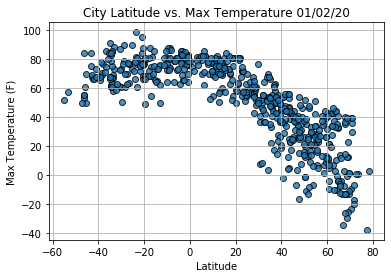

In [63]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

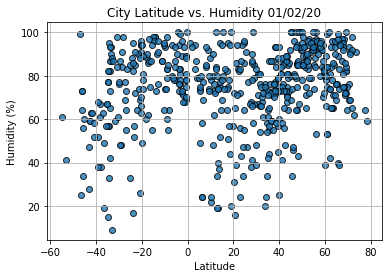

In [64]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

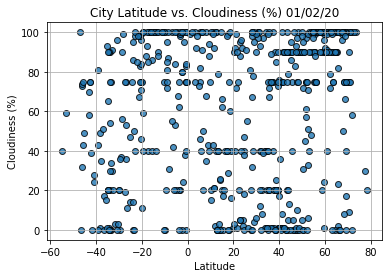

In [65]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

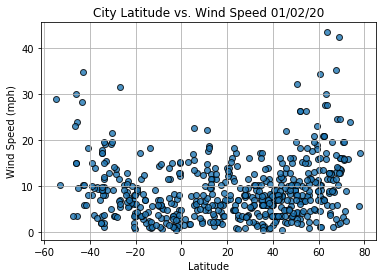

In [66]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [137]:
# Linear Regression
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress 
   # Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
# Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
# Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()  

In [138]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_weather_data_df.loc[(city_weather_data_df["Lat"] >= 0)]
southern_hemi_df = city_weather_data_df.loc[(city_weather_data_df["Lat"] < 0)]
southern_hemi_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Inyonga,TZ,2020-01-03 00:41:50,-6.72,32.06,64.60,94,100,3.11
1,Potosi,BO,2020-01-03 00:41:50,-19.59,-65.75,49.35,78,59,8.77
3,Busselton,AU,2020-01-03 00:41:51,-33.64,115.35,57.99,90,0,1.01
10,Rikitea,PF,2020-01-03 00:41:52,-23.12,-134.97,79.72,72,98,5.53
14,Cidreira,BR,2020-01-03 00:41:53,-30.17,-50.22,73.49,76,20,21.43


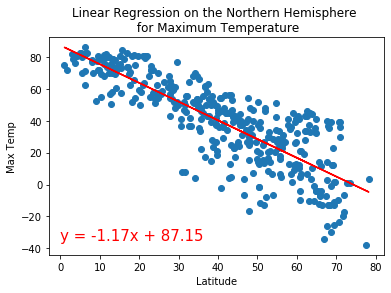

In [147]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(0,-35))

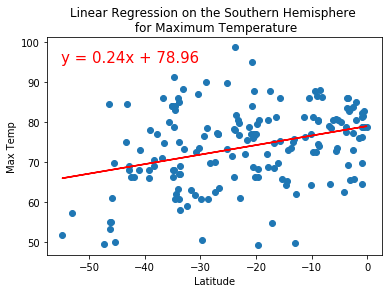

In [149]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,95))

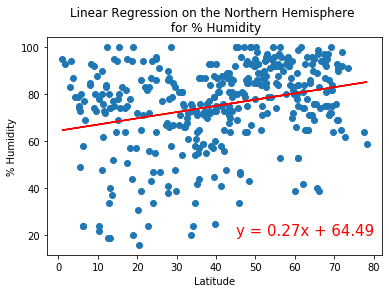

In [157]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,20))

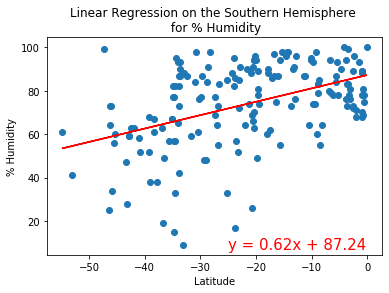

In [160]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-25,7))

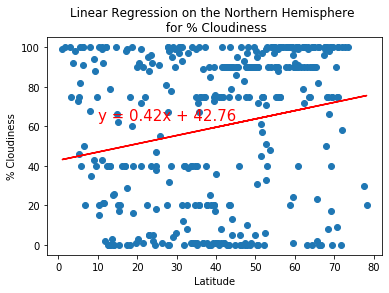

In [165]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,63))

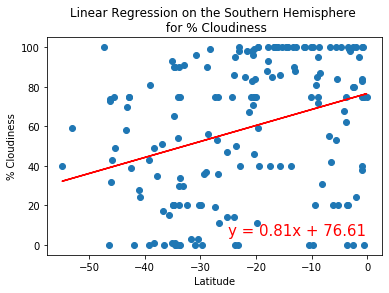

In [167]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-25,5))

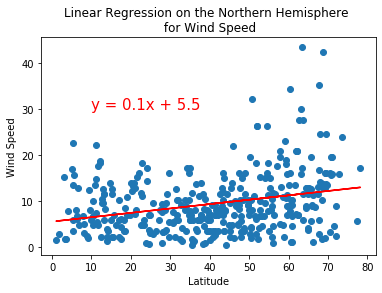

In [169]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10,30))

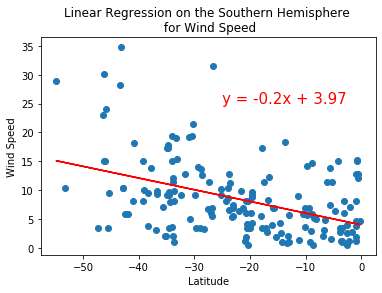

In [171]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-25,25))